### Time Series Momentum strategy

Time Series analysis basically means we look at the data for a period and based on the analysis we make our decisions.
Here we will focus only on the oast return of an asset. If this return is positive we buy the asset, if the return is negative we short/sell the asset.

In [2]:
# importing libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = yf.download('AAPL', start='2022-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
# Creating teh function to apply time series strategy
def ts_strategy(df, window=20):
    df = df.copy()
    df['returns'] = np.log(df.Close.pct_change() + 1)
    # Days we are going back to calculate 
    df['prior_n'] = df.returns.rolling(window).sum()
    df.dropna(inplace=True)
    # defining the position for going long or short
    df['position'] = [1 if i > 0 else -1 for i in df['prior_n']]
    # Defining the strategy returns
    df['strategy'] = df.position.shift(1) * df['returns']
    return np.exp(df[['returns', 'strategy']].cumsum()).plot(figsize=(10, 6), title='Time Series Strategy vs. Buy and Hold')

<Axes: title={'center': 'Time Series Strategy vs. Buy and Hold'}, xlabel='Date'>

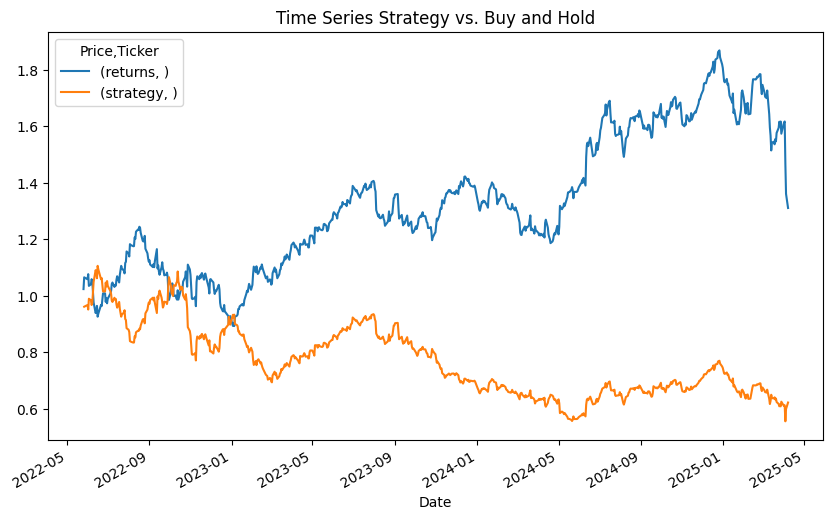

In [12]:
ts_strategy(df, 100)

This plot shows the accumulative returns vs the strategy, initially after 2022-05, the strategy and returns were rising gradually, but by the current year 2025 the returns on the asset rose over strategy returns.

Now let's take a look over other assets such as Bitcoin

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Time Series Strategy vs. Buy and Hold'}, xlabel='Date'>

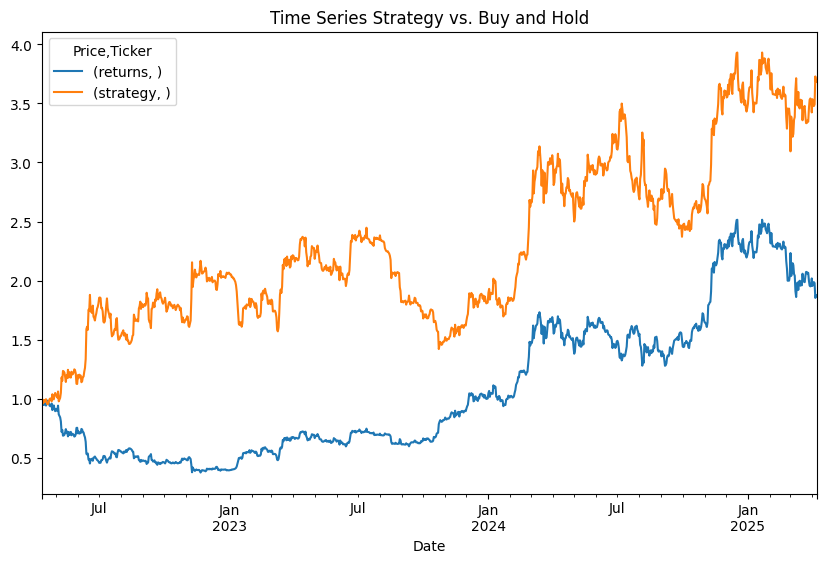

In [14]:
df = yf.download('BTC-USD', start='2022-01-01')
ts_strategy(df, 100)

Here, the strategy seems to work much better than Apple which is a blue chip share and they're generally less volatile to market fluctuations in comparison to Crypto.

Also we must take into consider the economic slowdown due to sanctions, tarrifs & recession.

Let's also check Forex USD

In [16]:
df = yf.download('EURUSD=X', start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Time Series Strategy vs. Buy and Hold'}, xlabel='Date'>

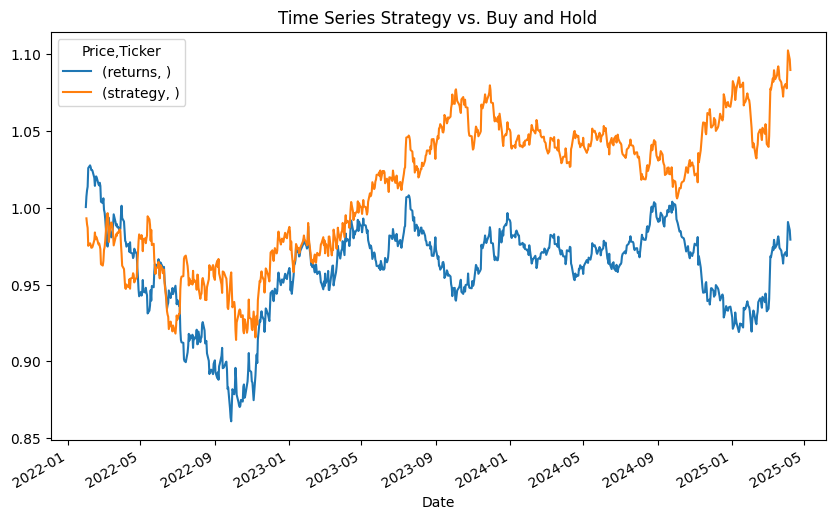

In [17]:
ts_strategy(df, 20)

Strategy seems to work well for BTC and EURUSD, but not for AAPL. We would need to fiddle around more.